# Body Measurements

This notebook loads, stores and displays data from body measurements taken at (hopefully) regular intervals.

The data will be recorded via my Obsidian vault. I have set up a folder where the measurement data is stored.

## Load measurements

In [3]:
# Input location where measurement data is stored.

import os

notes_location = '~/Vaults/Zettelkasten 2.0/Fitness/Data'
notes_location_path = os.path.expanduser(notes_location)
print(f"Will load data from '{notes_location_path}'")

Will load data from '/Users/andresap/Vaults/Zettelkasten 2.0/Fitness/Data'


In [4]:
from utils import parse_obsidian_metadata

# Define the measurements we are interested in
measurements = ["left biceps", "right biceps", "waist", "right thigh", "left thigh", "weight"]

# Define the tags to filter the notes
tags = ["#fitness", "#body-data"]

# Initialize data to store the measurements
body_data = []

# Load the data
for dirpath, dirnames, files in os.walk(notes_location_path):
    for file in files:
        fullpath = os.path.join(dirpath, file)
        metadata = parse_obsidian_metadata(fullpath) 
        note_has_all_tags = all([tag in metadata['tags'] for tag in tags])
        if not note_has_all_tags:
            continue

        # Exclude tags from data
        data = {key: value for key, value in metadata.items() if key != 'tags'}
        # Extract the measurement date
        measurement_date = metadata['date']
        # Exclude non-measurement data from data
        data = {key: value for key, value in data.items() if key in measurements} 
        # Add date
        data = {
            'date': measurement_date,
            **data
        }
        body_data += [data] 

print(f"Loaded {len(body_data)} measurement(s).")

Loaded 2 measurement(s).


In [5]:
# Turn data into dataframe. Make sure to use the date as index.
import pandas as pd

new_records = pd.DataFrame(body_data, index=[data['date'] for data in body_data])

## Store new measurements

Now, store the data in a file, so it is persisted. In this step, only new entries will be added to the data set.

In [6]:
import pandas as pd

storage_file_path = 'body_data.parquet'

if os.path.exists(storage_file_path):
    print("Loading existing data.")
    old_records = pd.read_parquet(storage_file_path)
    df = pd.concat([old_records, new_records])
    duplicates = new_records.index.duplicated(keep='first')
    if duplicates.any():
        print(f"Found {duplicates.sum()} duplicate records, will keep the first occurrence.")
    df = df[~df.index.duplicated(keep='first')]

if not os.path.exists(storage_file_path):
    print("No existing data found, will create a new storage file.")
    new_records.to_parquet(storage_file_path)
    df = new_records


Loading existing data.


## Visualization

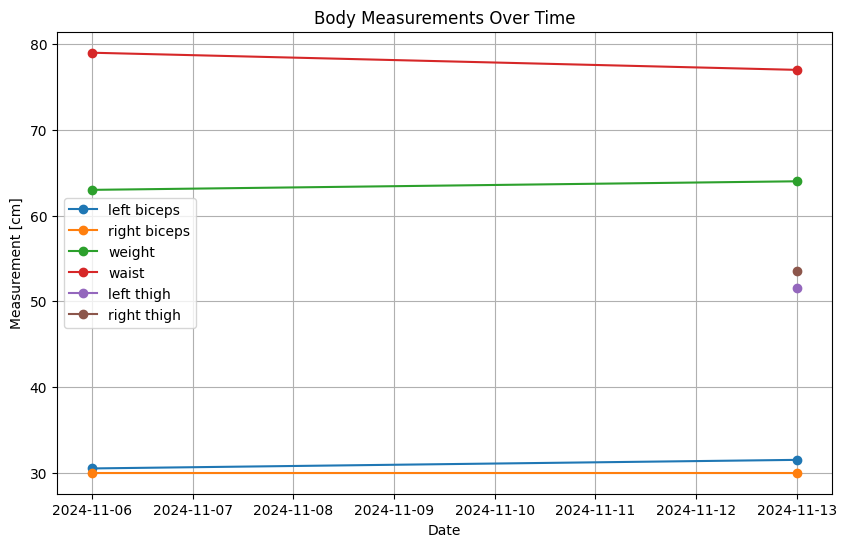

In [7]:
import matplotlib.pyplot as plt

# Plot the data in centimeters

df.plot(kind='line', figsize=(10, 6), marker='o')

plt.title('Body Measurements Over Time')
plt.xlabel('Date')
plt.ylabel('Measurement [cm]')
plt.legend(loc='best')
plt.grid(True)
plt.show()